# MNIST Handwritten Digit Classification




In [1]:
# import tools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import np_utils
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
# import data
train_data = pd.read_csv('/kaggle/input/mnist-dataset/train.csv')
test_data = pd.read_csv("/kaggle/input/mnist-dataset/test.csv")

In [3]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


In [4]:
train_data.shape

(42000, 785)

In [5]:
train_data['label'].value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [6]:
y_train = train_data['label'].values
X_train = train_data.drop(columns=['label']).values/255

In [7]:
x_train, x_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.20)
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(33600, 784)
(33600,)
(8400, 784)
(8400,)


## Visualization of data


In [8]:
x_train[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.68235294, 0.17254902,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

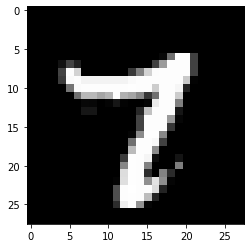

In [9]:
# first, let‘s generate a random number with numpy random, so everytime we get a different image
random_nr = np.random.randint(0, 42000)

# now, let‘s use imshow() to visualize the random number from our train dataset
plt.imshow(x_train[random_nr].reshape(28,28),cmap = 'gray')


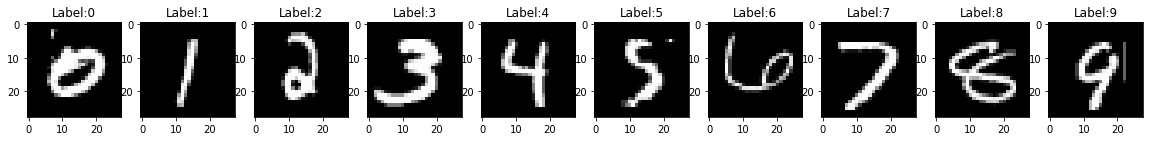

In [10]:
# Let‘s visualize one example per each digit using a for loop and matplotlib subplot
num_classes=10

# Create a subplot
fig, ax = plt.subplots(1, num_classes, figsize=(20,20)) # 1 row, 10 columns (num_classes)

# Loop through 10 classes from train dataset and add labels from test dataset
for i in range(num_classes):
  sample = x_train[y_train == i][0]
  ax[i].imshow(sample.reshape(28,28), cmap="gray")
  ax[i].set_title(f"Label:{i}")

## Classes to categories


In [11]:
# encode labels
# num_classes = 10
y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [12]:
for i in range(10):
  print(y_train[i])

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


# Data pre-processing 

In [13]:
# normalize the images
x_train = x_train/255.0
x_test = x_test/255.0

In [14]:
x_train.shape

(33600, 784)

In [15]:
x_train.shape[0]

33600

In [16]:
# reshape data
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)

In [17]:
x_train.shape

(33600, 784)

# Fully Connected Neural Network


In [18]:
#instanitiating the model
model = Sequential()

model.add(Dense(units=128, input_shape=(784, ), activation="relu"))
model.add(Dense(units=128, activation="relu"))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation="softmax"))

model.compile(loss="categorical_crossentropy", optimizer="adam", metrics="accuracy")
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dropout (Dropout)            (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 10)                1290      
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
_________________________________________________________________


In [19]:
# training the model 
BATCH_SIZE = 256
epochs = 200
model.fit(x=x_train, y=y_train, batch_size = BATCH_SIZE, epochs = epochs )

Epoch 1/200
132/132 [==============================] - 1s 5ms/step - loss: 2.0172 - accuracy: 0.4035
Epoch 2/200
132/132 [==============================] - 1s 5ms/step - loss: 1.0268 - accuracy: 0.6778
Epoch 3/200
132/132 [==============================] - 1s 5ms/step - loss: 0.7178 - accuracy: 0.7752
Epoch 4/200
132/132 [==============================] - 1s 5ms/step - loss: 0.5880 - accuracy: 0.8171
Epoch 5/200
132/132 [==============================] - 1s 5ms/step - loss: 0.5149 - accuracy: 0.8429
Epoch 6/200
132/132 [==============================] - 1s 5ms/step - loss: 0.4666 - accuracy: 0.8581
Epoch 7/200
132/132 [==============================] - 1s 5ms/step - loss: 0.4365 - accuracy: 0.8680
Epoch 8/200
132/132 [==============================] - 1s 5ms/step - loss: 0.4115 - accuracy: 0.8766
Epoch 9/200
132/132 [==============================] - 1s 5ms/step - loss: 0.3926 - accuracy: 0.8829
Epoch 10/200
132/132 [==============================] - 1s 5ms/step - loss: 0.3793 - accura

## Model evaluation



In [20]:
# Evaluate train and test 
train_loss, train_acc = model.evaluate(x_train, y_train)
test_loss, test_acc = model.evaluate(x_test, y_test)

# Print results
print(f"Train Loss: {train_loss}, Train Accuracy: {train_acc}")
print(f"Test Loss: {test_loss}, Test Accuracy: {test_acc}")

263/263 [==============================] - 1s 2ms/step - loss: 0.1429 - accuracy: 0.9699
Train Loss: 0.001958828419446945, Train Accuracy: 0.9998214244842529
Test Loss: 0.14294180274009705, Test Accuracy: 0.9698809385299683


## Make predictions



In [21]:
# Predict labels on test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1) # pick the highest probability with "np.argmax()", and turn it into an index uing "axis=1"

# print vector of probabilities
print(f"What Softmax predicted: {y_pred}")

# print predicted number
print(f"What Softmax actually means: {y_pred_classes}")


What Softmax predicted: [[1.28811669e-23 4.23793298e-13 2.36662636e-15 ... 1.07931358e-21
  1.00000000e+00 2.53239747e-12]
 [1.54025614e-24 6.90182571e-14 4.67467041e-25 ... 8.37678773e-24
  1.53483778e-15 1.32749964e-10]
 [1.02869386e-03 1.21860948e-08 3.12205239e-09 ... 2.84008661e-09
  1.04296545e-04 1.58670337e-05]
 ...
 [8.26388599e-13 2.16924723e-09 3.84313891e-12 ... 4.62618982e-03
  1.88109155e-08 9.95327711e-01]
 [5.31231553e-14 9.99868870e-01 1.56803040e-07 ... 1.30788452e-04
  2.45996397e-08 2.92234098e-10]
 [4.07894731e-07 1.74752568e-05 6.01668959e-04 ... 9.99367654e-01
  1.27951607e-05 7.89222993e-11]]
What Softmax actually means: [8 5 6 ... 9 1 7]


In [22]:
# choose a random sample from all the test data
random_num = np.random.choice(len(x_test))
X_sample = x_test[random_num]

# save true label of this sample in a variable
y_true = np.argmax(y_test, axis=1)
y_sample_true = y_true[random_num]

# save a predicted label of this sample in a variable
y_sample_pred_class = y_pred_classes[random_num]

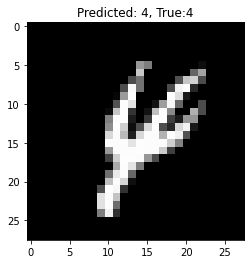

In [23]:
# visualize
plt.title(f"Predicted: {y_sample_pred_class}, True:{y_sample_true}")
plt.imshow(X_sample.reshape(28, 28), cmap="gray");

## Confusion matrix


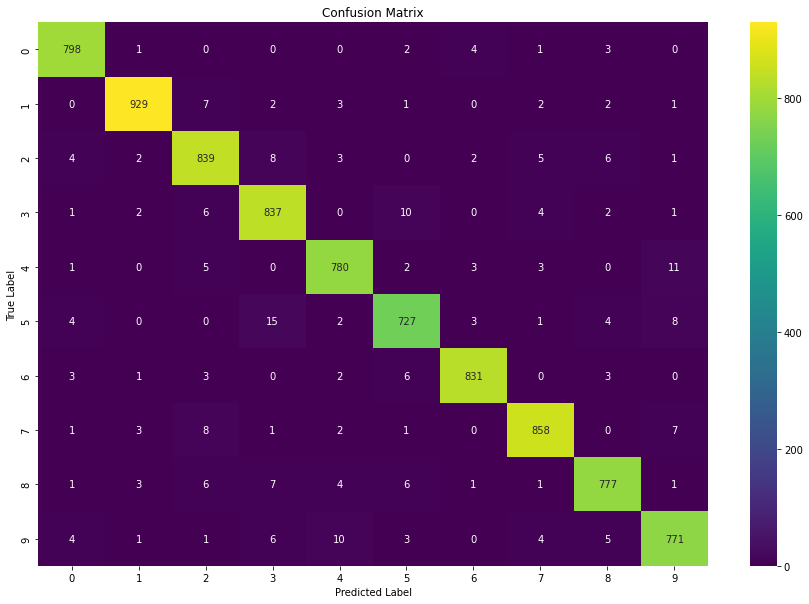

In [24]:
# generate a confusion matrix
confusion_mtx = confusion_matrix(y_true, y_pred_classes)

# visualize confusion matrix with matplotlib and seaborn
fig, ax = plt.subplots(figsize=(15, 10))
ax = sns.heatmap(confusion_mtx, annot=True, fmt="d", ax=ax, cmap="viridis")
ax.set_xlabel("Predicted Label")
ax.set_ylabel("True Label")
ax.set_title("Confusion Matrix");